In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings


In [28]:
#Definir el estilo de grafico y control de mensaje de advertencia
plt.style.use('seaborn')
#plt.style.use('seaborn-colorblind') Alternativa
#plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

/tmp/ipykernel_16837/2736962912.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [29]:
#Descargar  los datos
df = yf.download('AAPL', 
                start='2020-01-01', 
                end='2023-11-29',
                auto_adjust=False,
                progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059433,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200
...,...,...,...,...,...,...
2023-11-21,191.410004,191.520004,189.740005,190.639999,190.397049,38134500
2023-11-22,191.490005,192.929993,190.830002,191.309998,191.066193,39617700
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.727905,24048300


In [30]:
#Guardar solamente el precio de cierre ajustado
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df

,adj_close
Date,
2020-01-02,73.059433
2020-01-03,72.349136
2020-01-06,72.925636
2020-01-07,72.582649
2020-01-08,73.750237
...,...
2023-11-21,190.397049
2023-11-22,191.066193
2023-11-24,189.727905


In [31]:
#Calcular los rendimientos simples
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df

,adj_close,log_rtn
Date,,
2020-01-02,73.059433,NaN
2020-01-03,72.349136,-0.009770
2020-01-06,72.925636,0.007937
2020-01-07,72.582649,-0.004714
2020-01-08,73.750237,0.015958
...,...,...
2023-11-21,190.397049,-0.004240
2023-11-22,191.066193,0.003508
2023-11-24,189.727905,-0.007029


In [32]:
#Eliminar Datos Redundantes
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df

,log_rtn
Date,
2020-01-03,-0.009770
2020-01-06,0.007937
2020-01-07,-0.004714
2020-01-08,0.015958
2020-01-09,0.021018
...,...
2023-11-21,-0.004240
2023-11-22,0.003508
2023-11-24,-0.007029


In [33]:
#Definir función para calcular volatilidad historica
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [34]:
#Calcular volatilidad historica mensual
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn':'rv'}, inplace=True)

In [35]:
#Anualizar los valores
df_rv.rv = df_rv.rv * np.sqrt(12)

Matplotlib is building the font cache; this may take a moment.


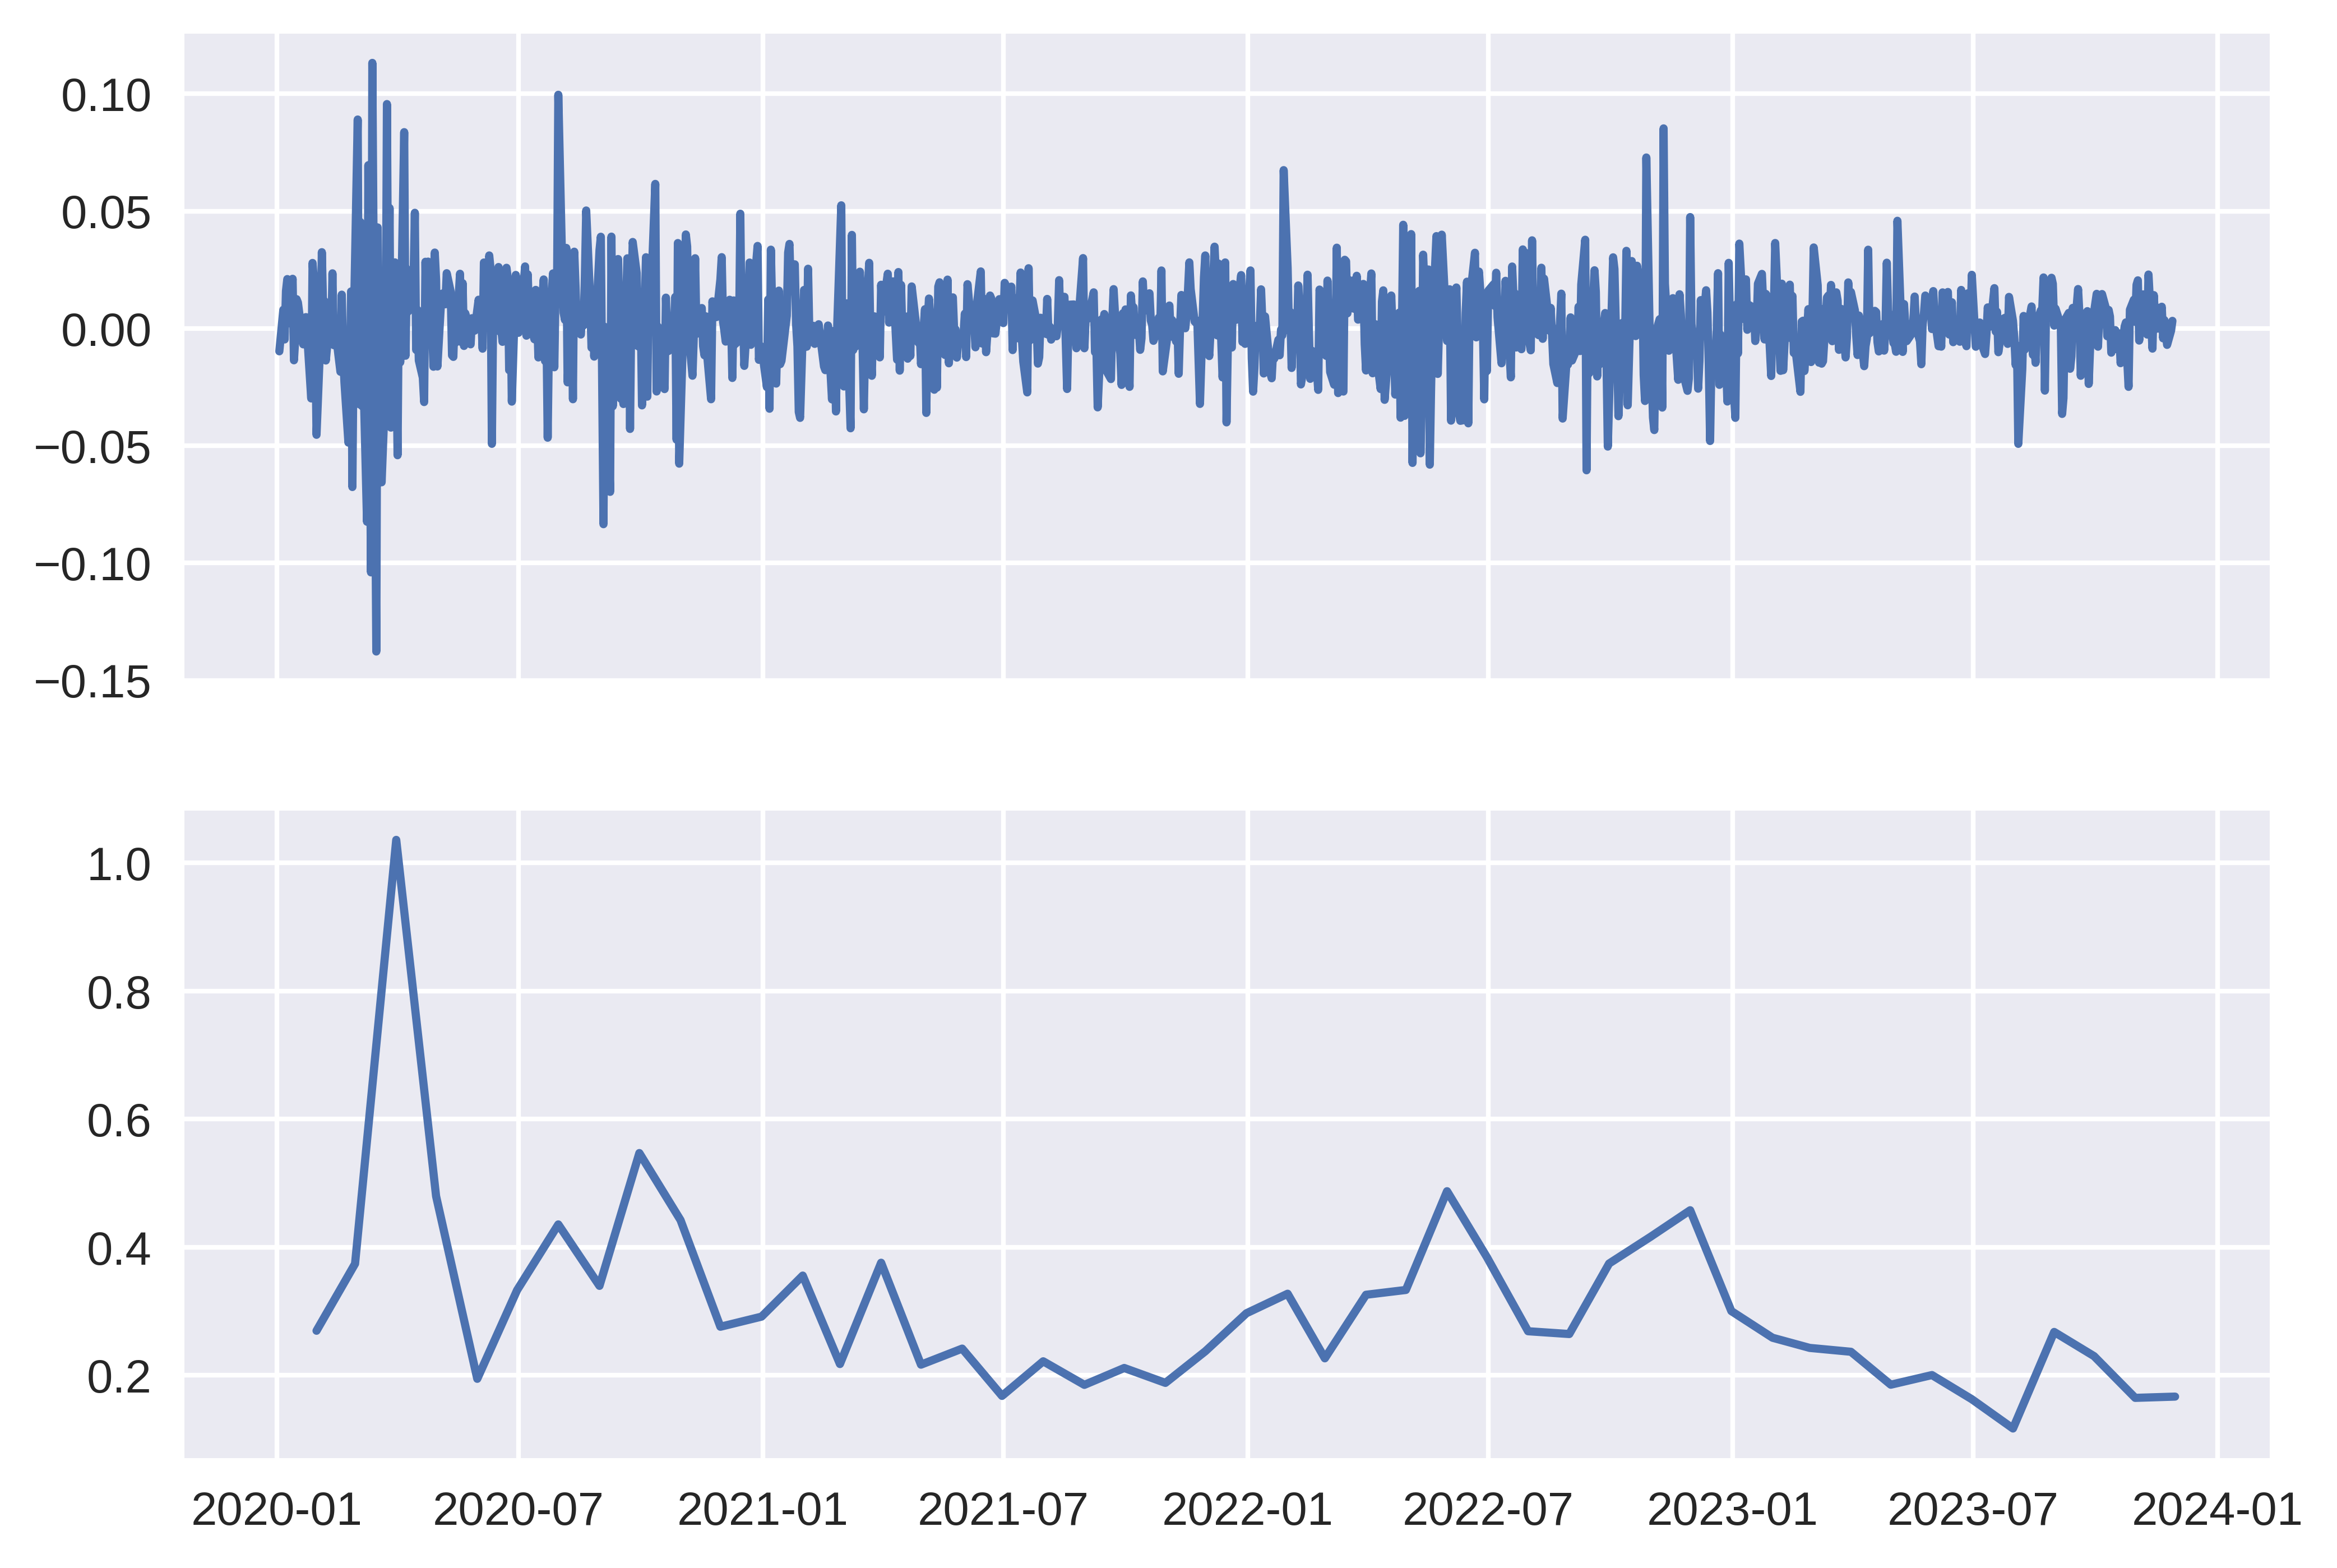

In [36]:
#Graficar resultados
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)

#plt.tight.layout()
#plt.savefig('images/ch1_im6.png)
plt.show()